In [642]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [643]:
pd.pandas.set_option("display.max_columns",None)

In [644]:
test_data = pd.read_csv("H:/boiling_liquid_expanding_vapour_explosion/test(1).csv")

In [645]:
test_data.tail()

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z
3198,3198,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,13,2,12.15,2.6,-1.9
3199,3199,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,14,2,12.15,2.6,4.4
3200,3200,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,15,2,12.15,2.6,10.7
3201,3201,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,16,2,12.15,7.9,-1.9
3202,3202,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,17,2,12.15,7.9,4.4


# Training Data:

In [646]:
train_data = pd.read_csv("H:/boiling_liquid_expanding_vapour_explosion/train(1).csv")

In [647]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10000 non-null  int64  
 1   Tank Failure Pressure (bar)      10000 non-null  float64
 2   Liquid Ratio (%)                 10000 non-null  float64
 3   Tank Width (m)                   10000 non-null  float64
 4   Tank Length (m)                  10000 non-null  float64
 5   Tank Height (m)                  10000 non-null  float64
 6   BLEVE Height (m)                 10000 non-null  float64
 7   Vapour Height (m)                10000 non-null  float64
 8   Vapour Temperature (K)           10000 non-null  float64
 9   Liquid Temperature (K)           10000 non-null  float64
 10  Obstacle Distance to BLEVE (m)   10000 non-null  int64  
 11  Obstacle Width (m)               10000 non-null  int64  
 12  Obstacle Height (m)

In [648]:
train_data = train_data.drop(columns="ID")

In [649]:
train_data.isnull().sum()

Tank Failure Pressure (bar)        0
Liquid Ratio (%)                   0
Tank Width (m)                     0
Tank Length (m)                    0
Tank Height (m)                    0
BLEVE Height (m)                   0
Vapour Height (m)                  0
Vapour Temperature (K)             0
Liquid Temperature (K)             0
Obstacle Distance to BLEVE (m)     0
Obstacle Width (m)                 0
Obstacle Height (m)                0
Obstacle Thickness (m)             0
Obstacle Angle                     0
Status                             0
Liquid Critical Pressure (bar)     0
Liquid Boiling Temperature (K)     0
Liquid Critical Temperature (K)    0
Sensor ID                          0
Sensor Position Side               0
Sensor Position x                  0
Sensor Position y                  0
Sensor Position z                  0
Target Pressure (bar)              0
dtype: int64

## Checking for Correlation:

As we can see datatype for most of the features is float so we will check for correlation in 2 ways:
1. Between Independent Features
2. Between Dependent and Independent Features

In [650]:
corr_df = pd.DataFrame(train_data.corr(numeric_only=True))

<Axes: >

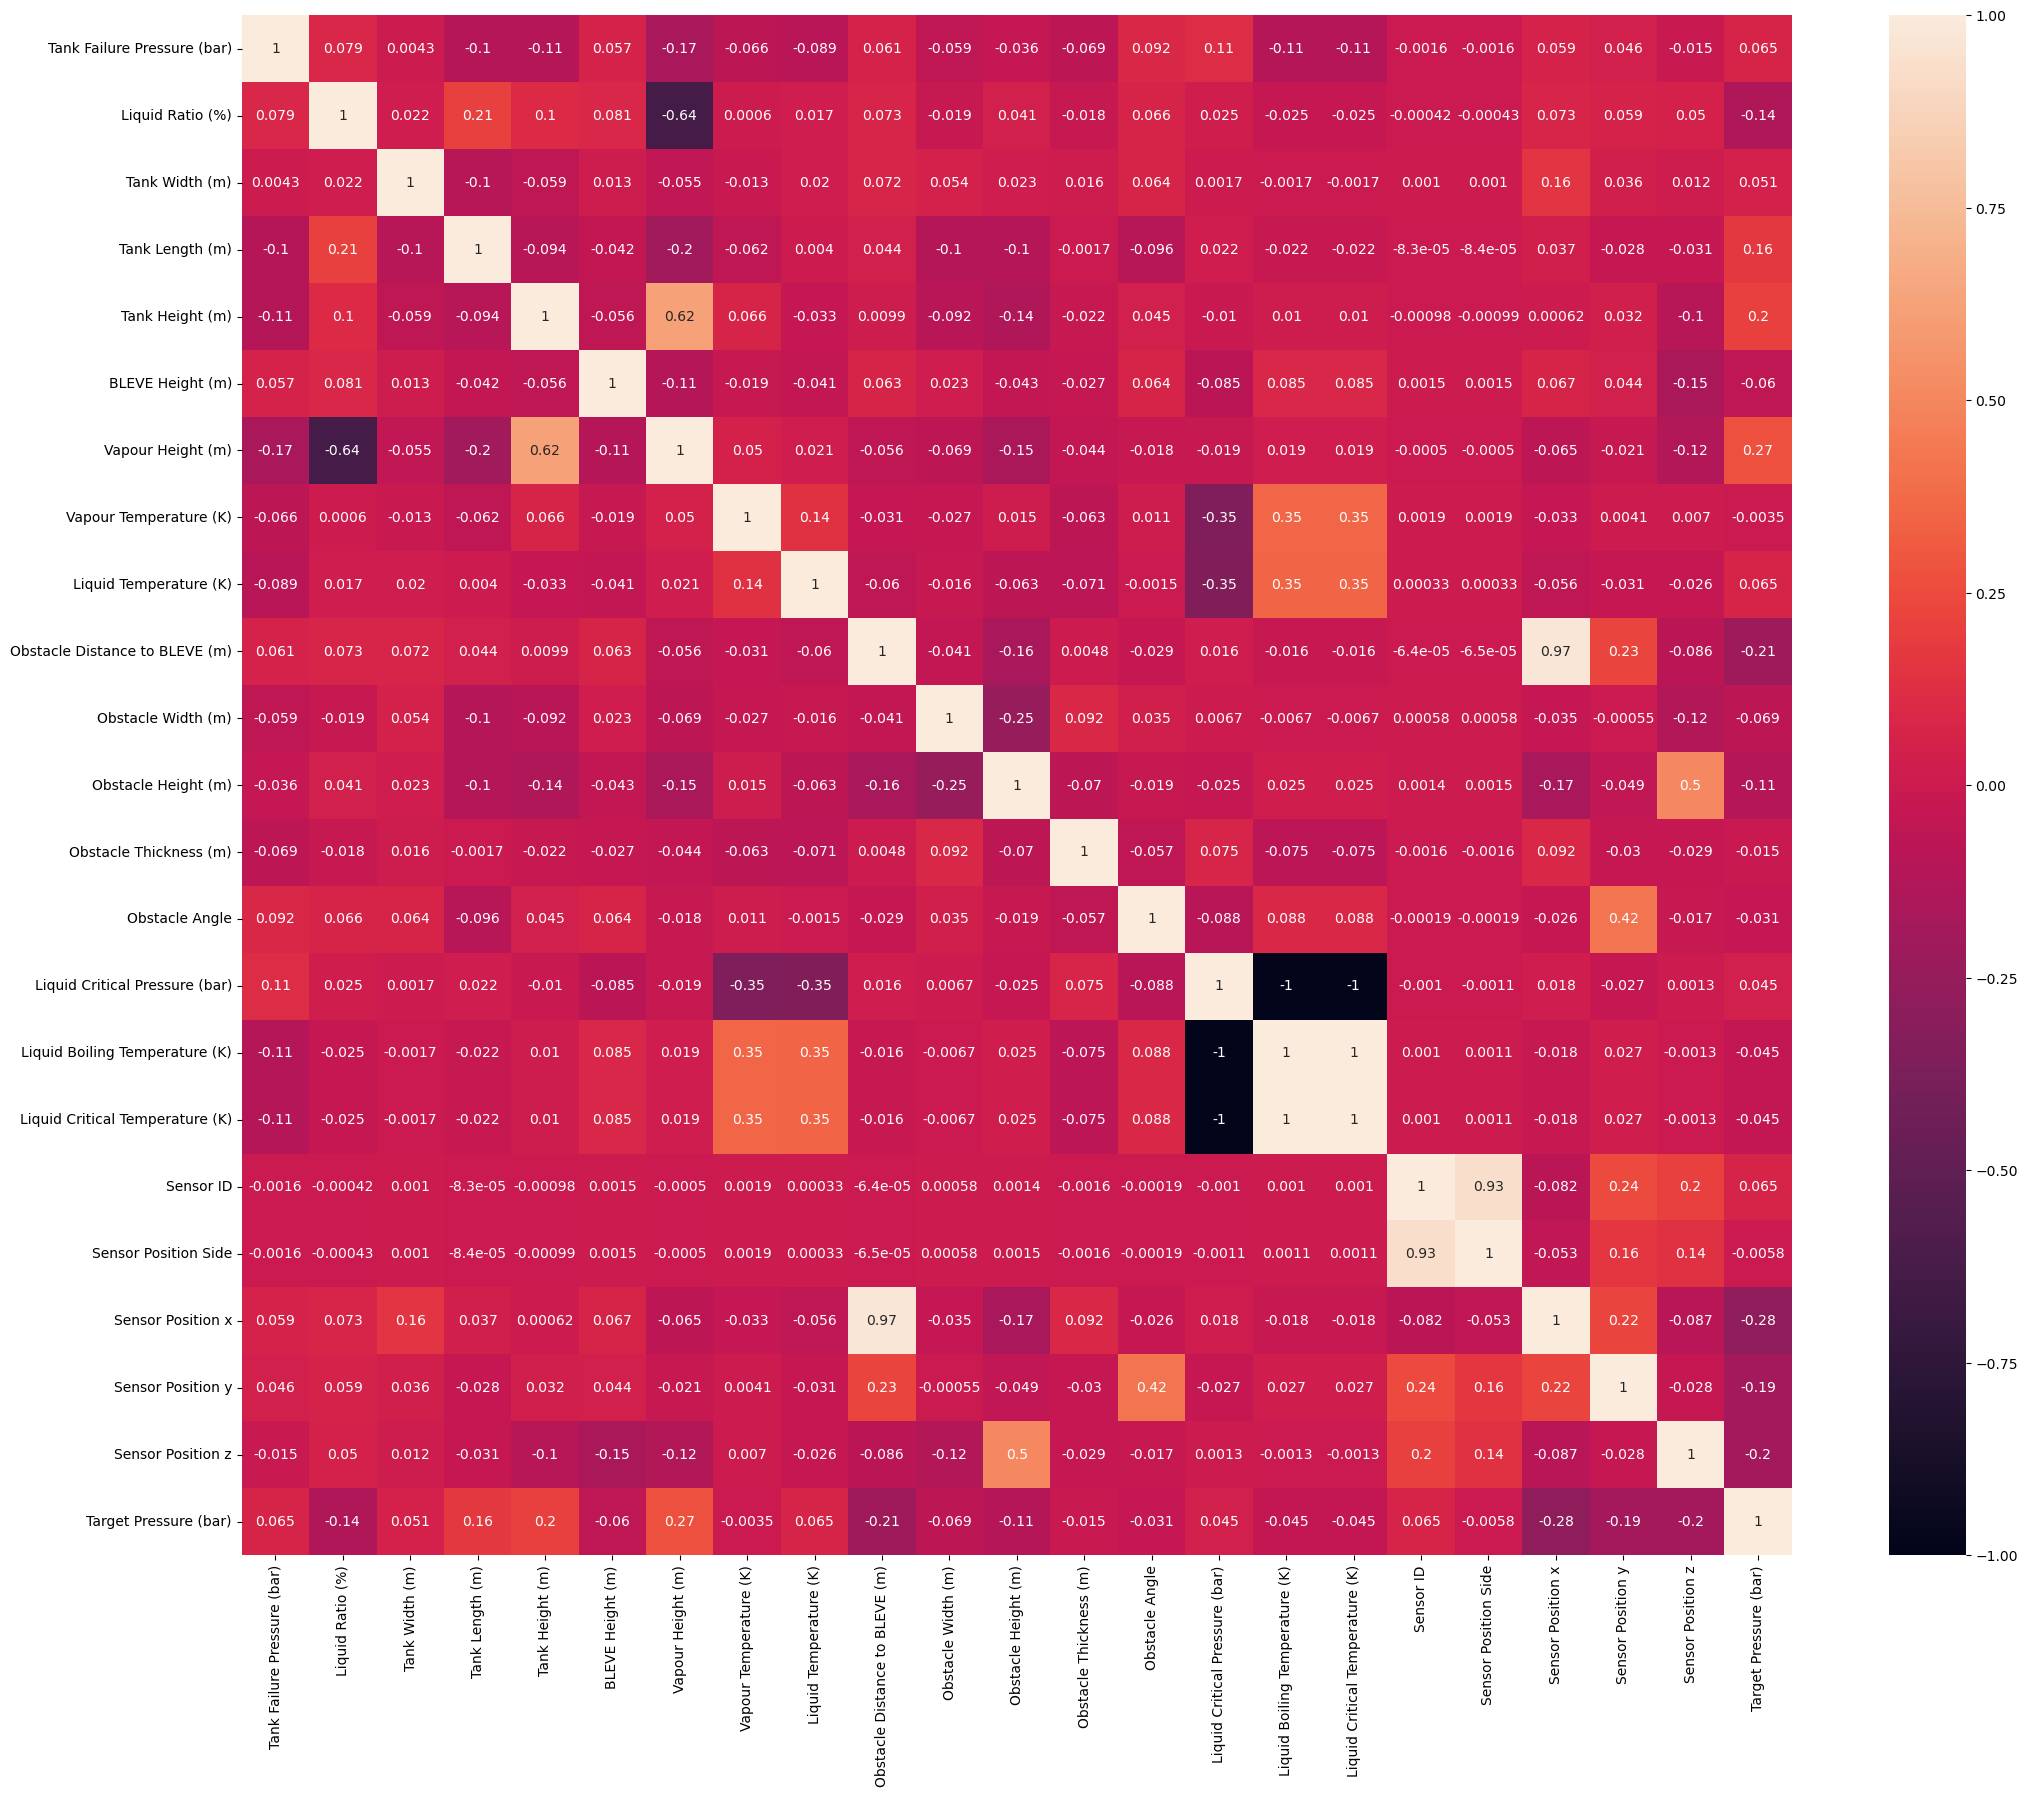

In [651]:
fig ,ax  = plt.subplots(figsize = (25,20))
sns.heatmap(corr_df,annot=True,ax=ax,cmap='rocket')

We can see that some independent features are collinear which should be removed.

We can see from the above plots that there isnt any linear relation between the target and independent columns.

In [652]:
#train_data = train_data.drop(columns=["Sensor Position x","Sensor Position Side"])

In [653]:
# Calculating Spearman Correlation to capture non linear relations
#from scipy.stats import spearmanr

#for col in train_data.columns:
#    if col != 'Target Pressure (bar)':
#        corr, p_value = spearmanr(train_data[col], train_data['Target Pressure (bar)'])
#        print("Column Name: ",col)
#        print("Spearman Correlation:", corr)
#        print("P-value:", p_value)
#        print("="*50)

## Analyzing Existing Dataset:

In [654]:
#train_data['Obstacle Volume'] = train_data['Obstacle Width (m)'] * train_data['Obstacle Height (m)'] * train_data['Obstacle Thickness (m)']
#train_data["Tank Volume"] = train_data["Tank Length (m)"] * train_data['Tank Height (m)'] * train_data['Tank Width (m)']

In [655]:
train_data.head()

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position y,Sensor Position z,Target Pressure (bar),Obstacle Volume,Tank Volume
0,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,18,7.90,10.7,0.199929,85.8,12.96
1,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,19,-2.95,-1.9,0.435681,85.8,12.96
2,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,20,-2.95,4.4,0.264031,85.8,12.96
3,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,21,-2.95,10.7,0.270576,85.8,12.96
4,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,22,-2.70,11.0,0.204675,85.8,12.96


### Discrete Variables Analysis:

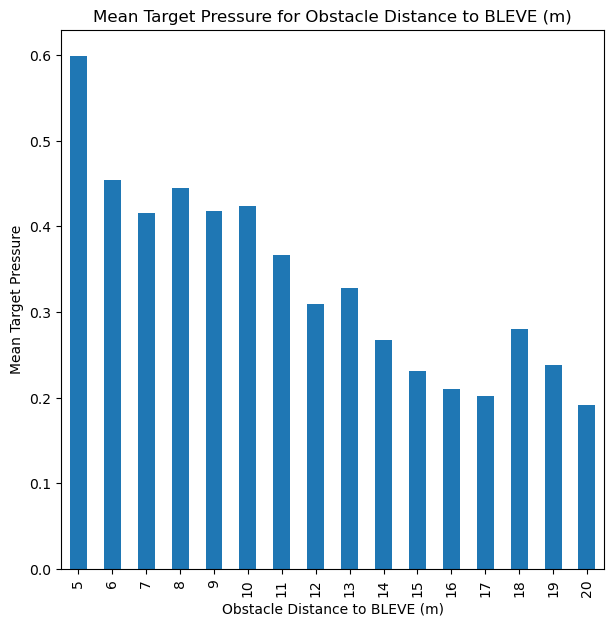

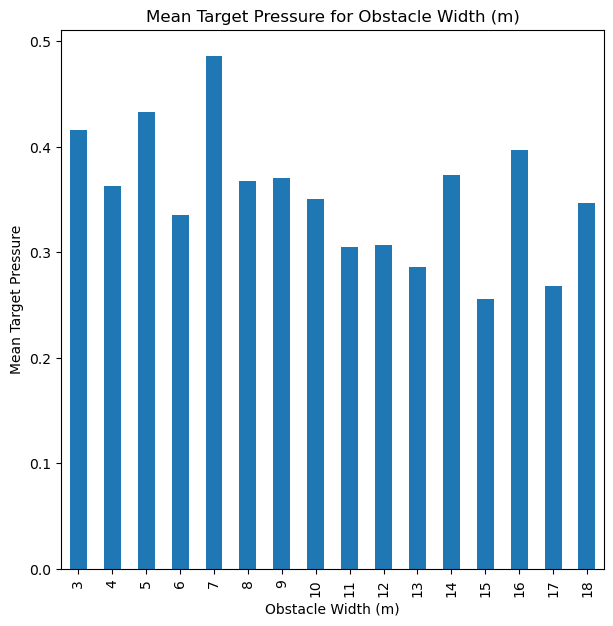

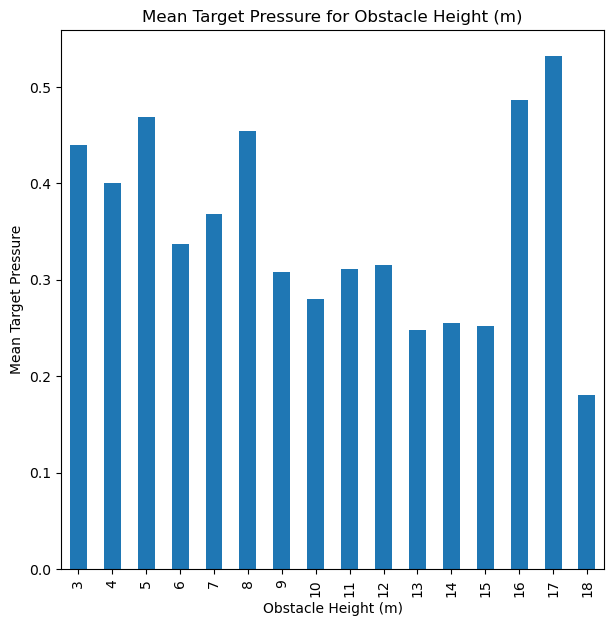

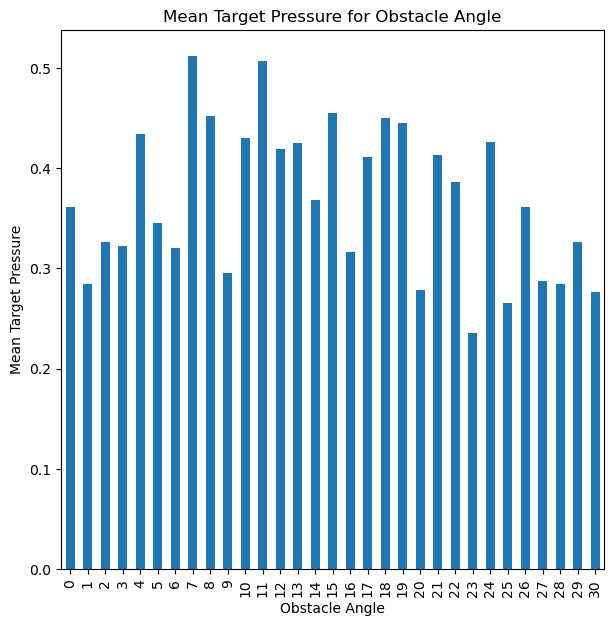

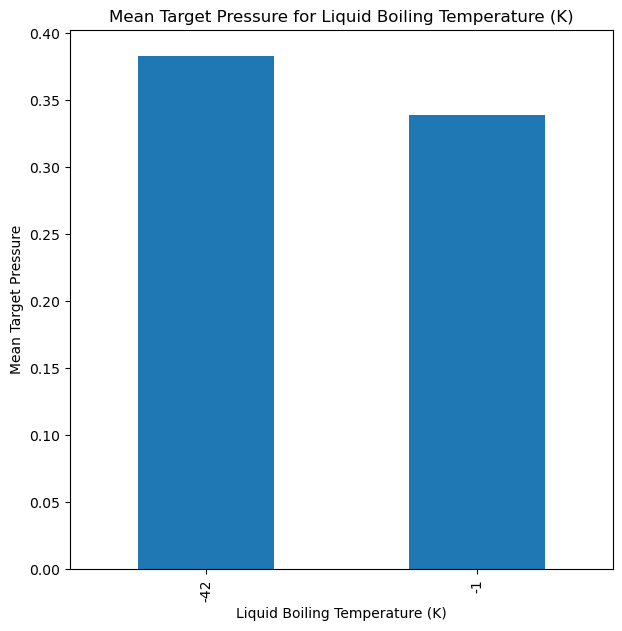

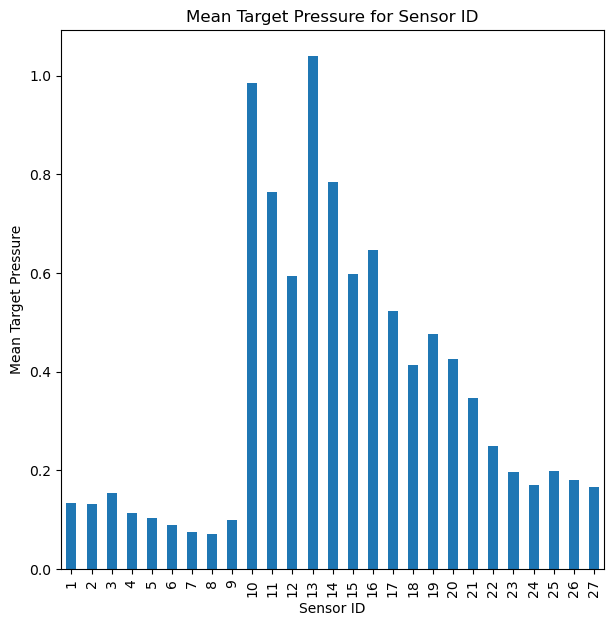

In [656]:
for col in train_data.columns:
    if train_data[col].dtypes == 'int64':
        fig ,ax  = plt.subplots(figsize = (7,7))
        grouped = train_data.groupby(col)['Target Pressure (bar)'].mean()

        grouped.plot(kind='bar',ax=ax)
        plt.xlabel(col)
        plt.ylabel('Mean Target Pressure')
        plt.title(f'Mean Target Pressure for {col}')
        plt.show()

#### Findings:
- The most closest obstacle placed felt most pressure and obstacle distance have a **_monotonic relation_** with the target feature

- The most pressure was felt by the object with 17m height and most least by 18m height.

- We can see here that the most pressure generated was by "SuperHeated" liquid type

- On average more pressure was generated by higher substance critical temperature

- We can see the most pressure from waves felt by the sensors were 10(bottom left of obstacle) and 14(middle of obstacle)

### Continous Features:

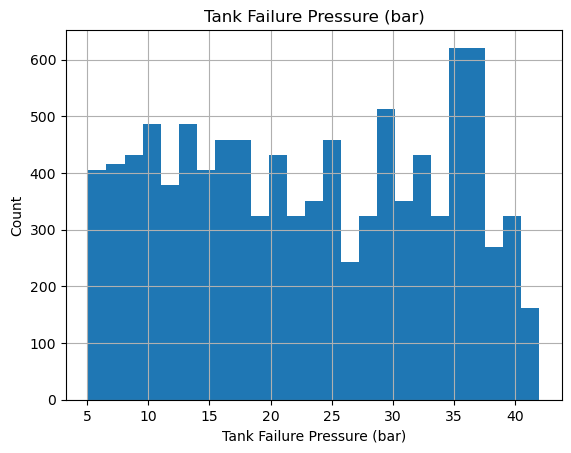

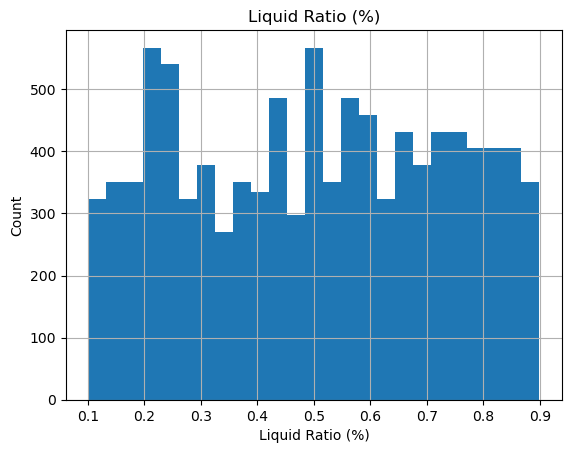

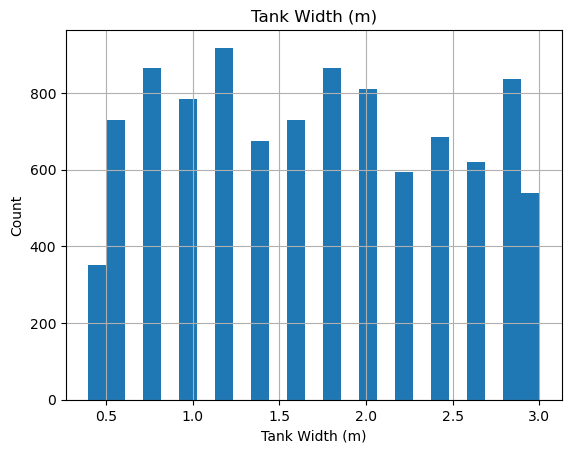

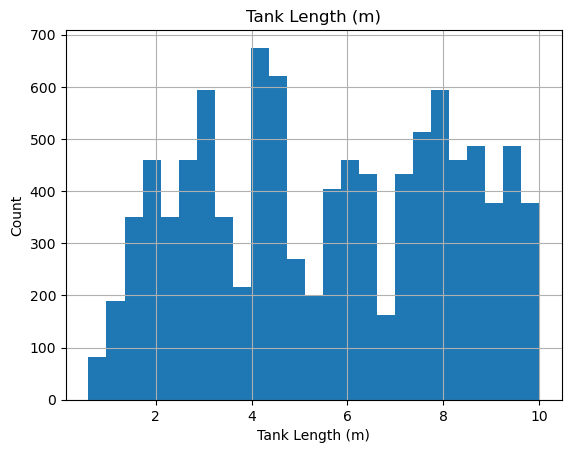

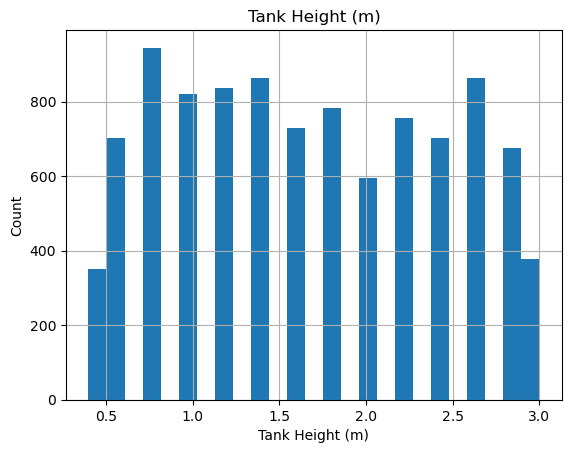

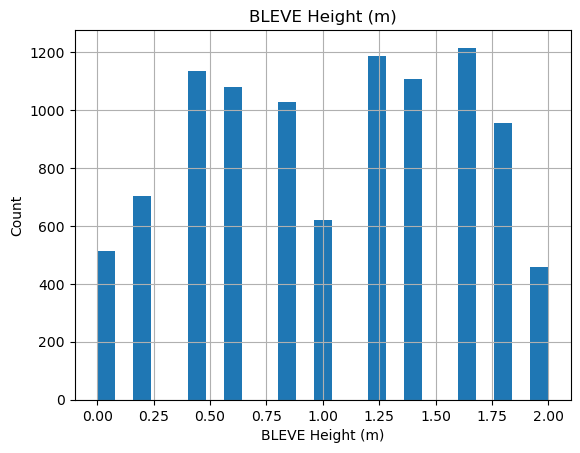

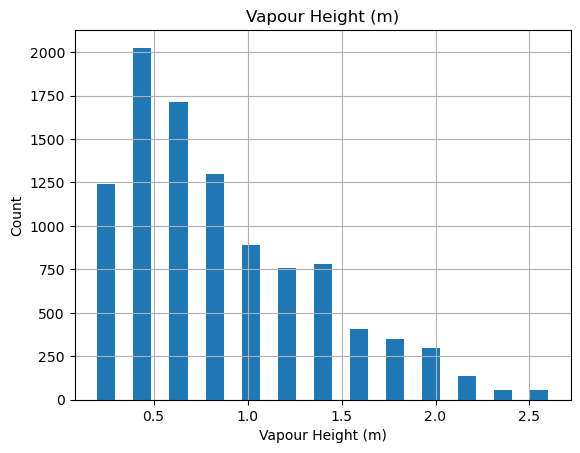

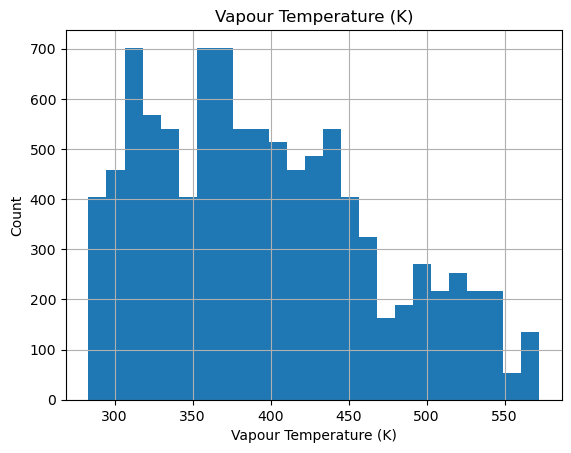

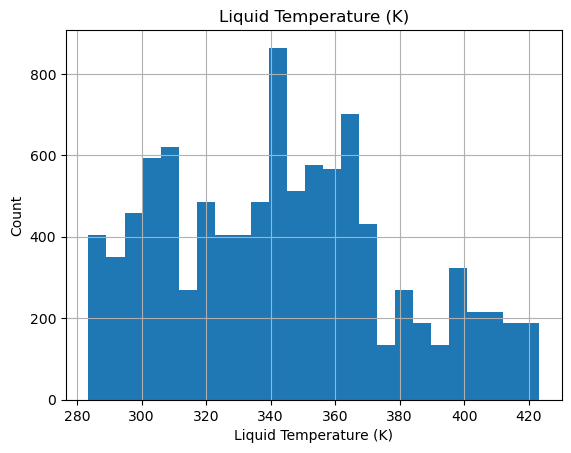

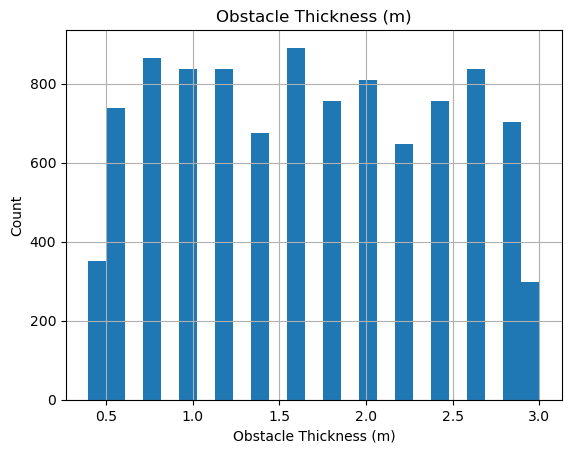

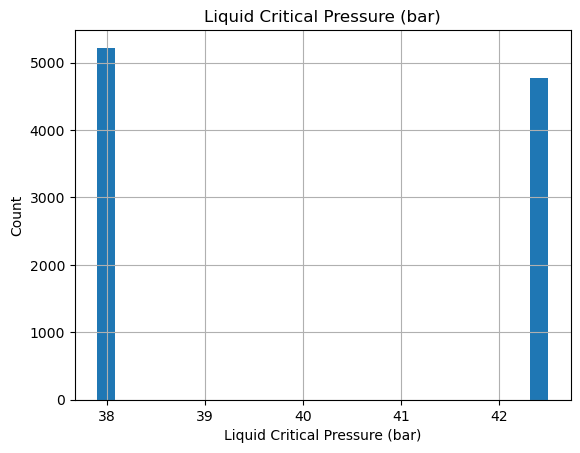

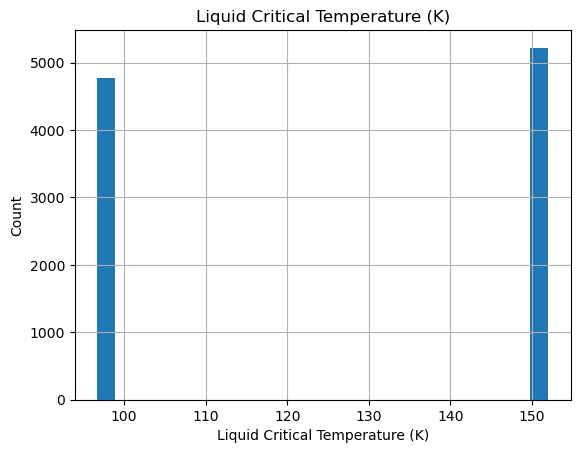

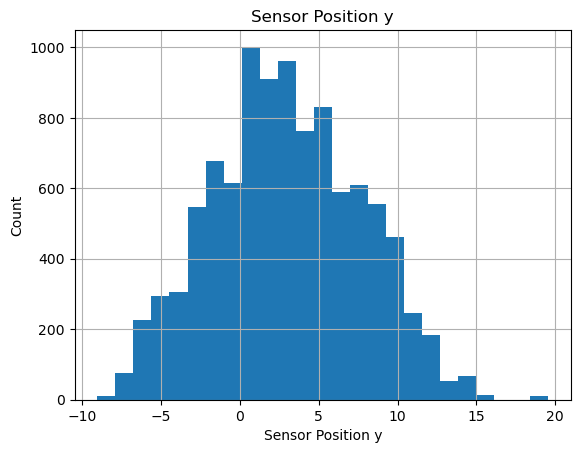

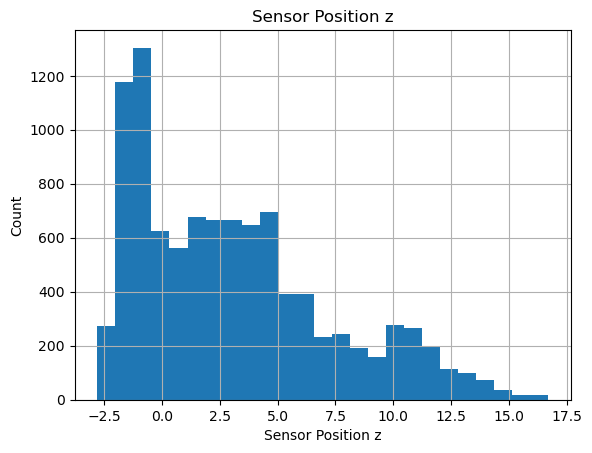

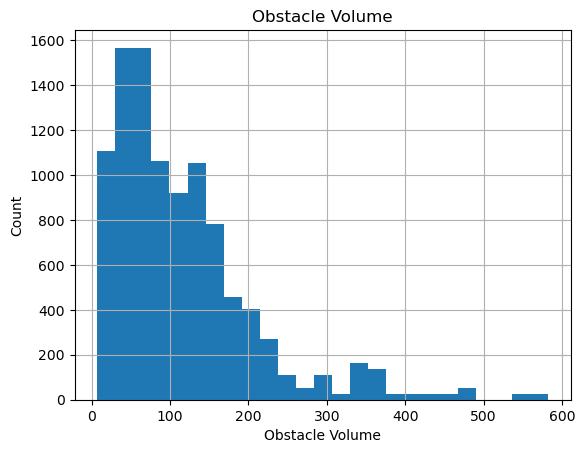

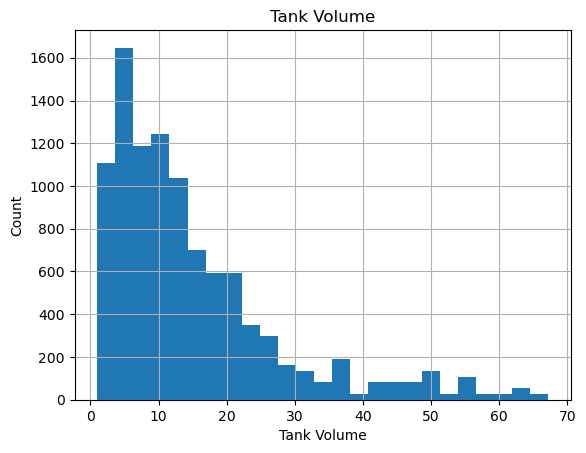

In [657]:
#Lets analyse the continuous values by creating histograms to understand the distribution

for col in train_data.columns:
    if train_data[col].dtypes == 'float64' and col!= 'Target Pressure (bar)':
        train_data[col].hist(bins=25)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(col)
        plt.show()

We can see these distributions aren't normal!

### Checking for 0 std:

In [658]:
data_n = train_data.describe()
col_to_drop = []
try:
    for x in train_data.columns:
        if (data_n[x]['std'] == 0):  # check if standard deviation is zero
            col_to_drop.append(x)
except Exception as e:
    print("Error", e)

print("zero standard deviation cols:", col_to_drop)

Error 'Status'
zero standard deviation cols: []


### Seggregating Numerical and Categorical Columns:

In [659]:
for col in train_data.columns:
    print(f"{col}:{train_data[col].unique().size}")

Tank Failure Pressure (bar):226
Liquid Ratio (%):371
Tank Width (m):14
Tank Length (m):48
Tank Height (m):14
BLEVE Height (m):11
Vapour Height (m):13
Vapour Temperature (K):337
Liquid Temperature (K):328
Obstacle Distance to BLEVE (m):16
Obstacle Width (m):16
Obstacle Height (m):16
Obstacle Thickness (m):14
Obstacle Angle:31
Status:2
Liquid Critical Pressure (bar):2
Liquid Boiling Temperature (K):2
Liquid Critical Temperature (K):2
Sensor ID:27
Sensor Position y:415
Sensor Position z:180
Target Pressure (bar):9997
Obstacle Volume:199
Tank Volume:309


In [660]:
cat_col = []
num_col = []
for col in train_data.columns:
    if train_data[col].dtypes == 'object':
        cat_col.append(col)
    else:
        num_col.append(col)

In [661]:
cat_col

['Status']

In [662]:
num_col

['Tank Failure Pressure (bar)',
 'Liquid Ratio (%)',
 'Tank Width (m)',
 'Tank Length (m)',
 'Tank Height (m)',
 'BLEVE Height (m)',
 'Vapour Height (m)',
 'Vapour Temperature (K)',
 'Liquid Temperature (K)',
 'Obstacle Distance to BLEVE (m)',
 'Obstacle Width (m)',
 'Obstacle Height (m)',
 'Obstacle Thickness (m)',
 'Obstacle Angle',
 'Liquid Critical Pressure (bar)',
 'Liquid Boiling Temperature (K)',
 'Liquid Critical Temperature (K)',
 'Sensor ID',
 'Sensor Position y',
 'Sensor Position z',
 'Target Pressure (bar)',
 'Obstacle Volume',
 'Tank Volume']

### Mapping Categorical Cols to Numerical

In [720]:
#for col in train_data.drop(['Status'],axis=1).columns:
 #   print(col)
 #   pd.get_dummies(train_data, columns=[col])

In [664]:
train_data["Status"].unique()

array(['Superheated', 'Subcooled'], dtype=object)

In [665]:
train_data["Status"] = train_data["Status"].map({'Superheated': 1, 'Subcooled': 2})

In [666]:
train_data["Status"].unique()

array([1, 2], dtype=int64)

### Separating Features and Labels

In [667]:
# Copying for safer side
train_data_copy = train_data.copy()

In [668]:
x_train = train_data_copy.drop(columns="Target Pressure (bar)")
y_train = train_data_copy[["Target Pressure (bar)"]]

In [669]:
x_train.head()

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position y,Sensor Position z,Obstacle Volume,Tank Volume
0,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,1,37.9,-1,152.0,18,7.90,10.7,85.8,12.96
1,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,1,37.9,-1,152.0,19,-2.95,-1.9,85.8,12.96
2,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,1,37.9,-1,152.0,20,-2.95,4.4,85.8,12.96
3,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,1,37.9,-1,152.0,21,-2.95,10.7,85.8,12.96
4,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,1,37.9,-1,152.0,22,-2.70,11.0,85.8,12.96


In [670]:
y_train.head()

,Target Pressure (bar)
0,0.199929
1,0.435681
2,0.264031
3,0.270576
4,0.204675


### Normalization and Standardization:

In [671]:
x_train["Liquid Boiling Temperature (K)"].unique()

array([ -1, -42], dtype=int64)

In [672]:
zero_mask = train_data.eq(0)

# Check which columns have at least one True (zero value)
zero_columns = zero_mask.any()

# Print the columns with zero values
print("Columns with Zero Values:")
print(zero_columns[zero_columns].index.tolist())

Columns with Zero Values:
['BLEVE Height (m)', 'Obstacle Angle', 'Sensor Position y', 'Sensor Position z']


- Versatility: The 'yeo-johnson' method is more versatile than the 'box-cox' method because it can handle a wider range of input values, including zero and negative values.
<br>

- Scaling: PowerTransformer centers and scales the data to have a mean of 0 and standard deviation of 1 after the transformation. This helps in making the data more comparable and easier for models to learn from.

In [673]:
# Initialize PowerTransformer with 'yeo-johnson' method
#from sklearn.preprocessing import PowerTransformer
#pt = PowerTransformer(method='yeo-johnson',standardize=True)

# Fit and transform the data
#transformed_data = pt.fit_transform(x_train)

# Convert transformed data back to DataFrame
#x_train_transformed = pd.DataFrame(transformed_data, columns=x_train.columns)

In [674]:
#x_train_transformed["Liquid Boiling Temperature (K)"].unique()

#### Before Transformation X-Train Plot:

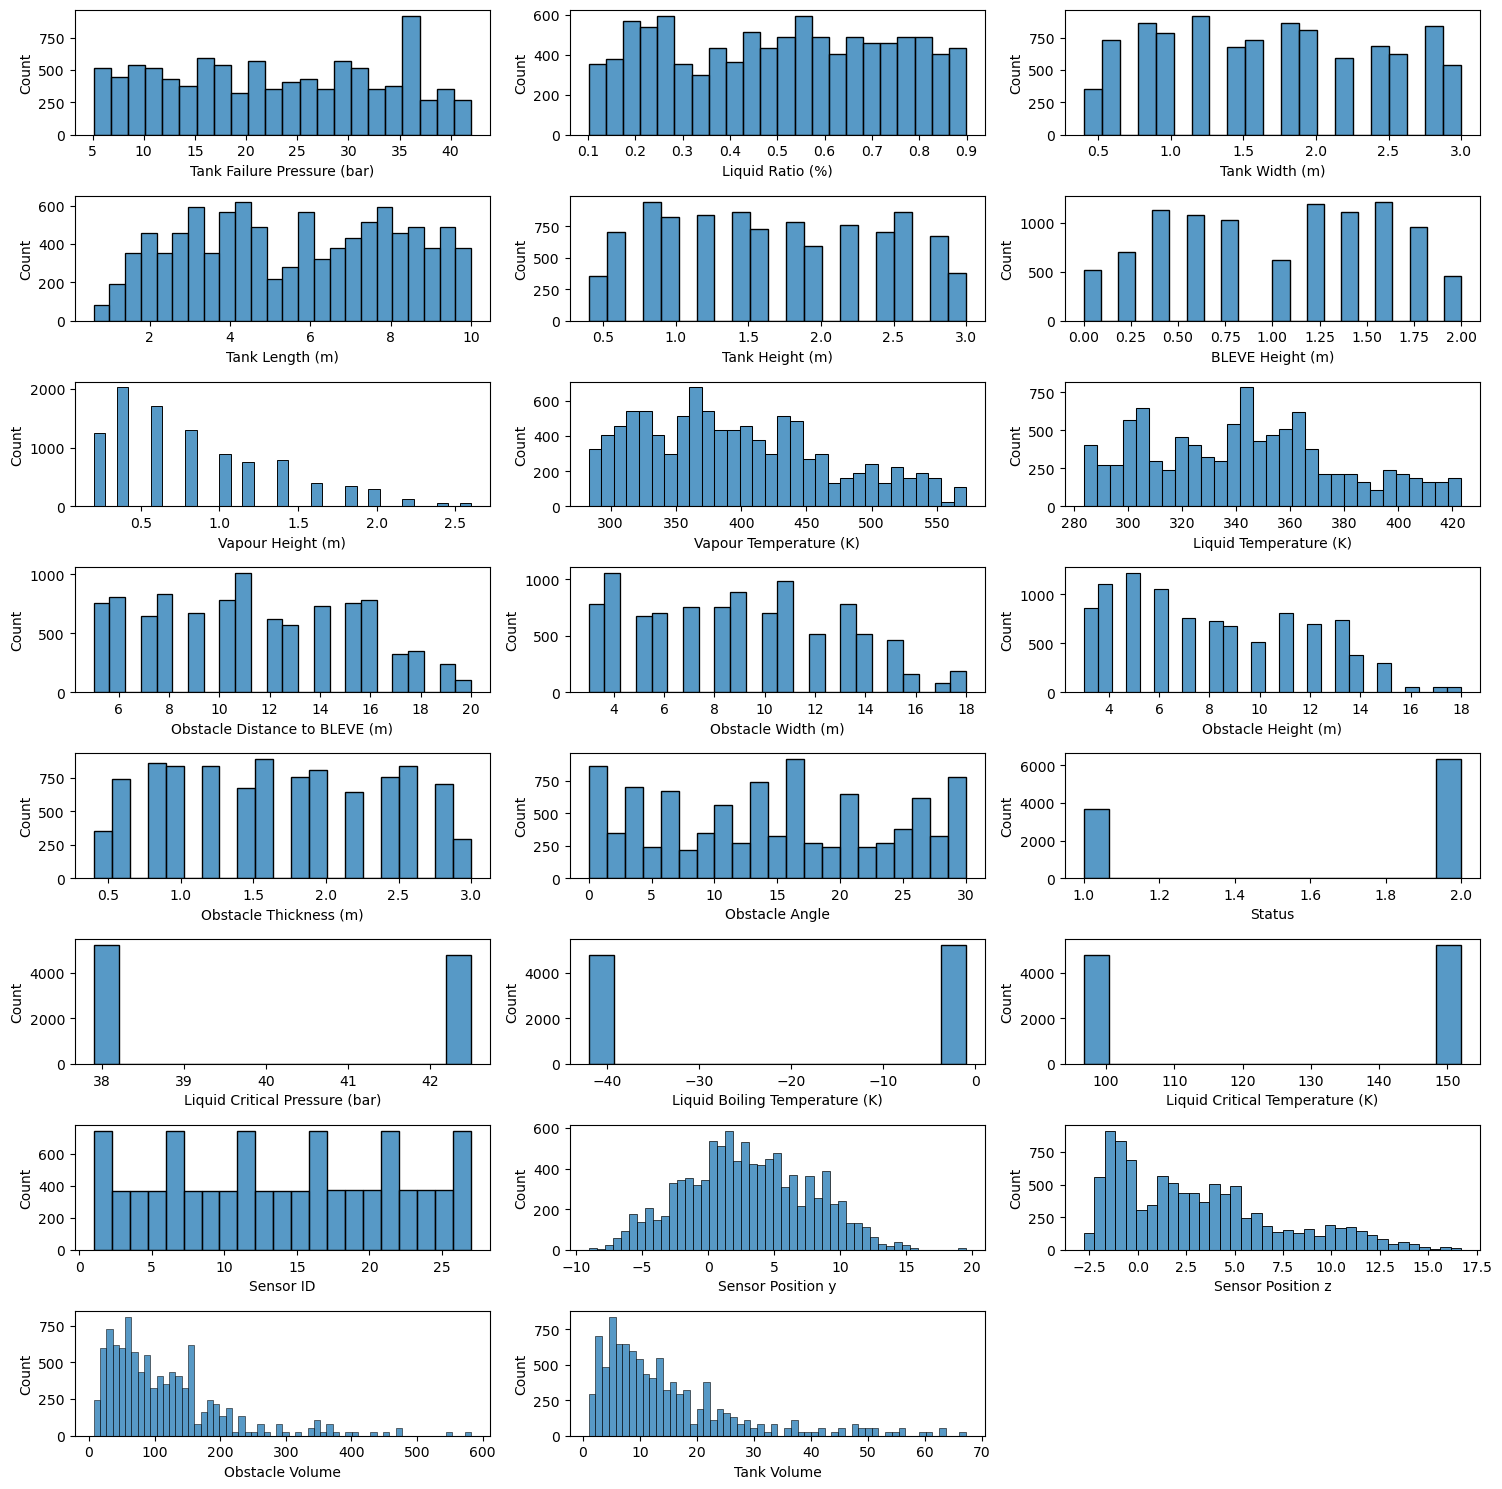

In [675]:
# Assuming x_train is a DataFrame with columns to plot
plt.figure(figsize=(15, 15), facecolor='white')

# Calculate the number of rows and columns needed based on the number of columns in x_train
num_cols = x_train.shape[1]
num_rows = int(np.ceil(num_cols / 3))  # 3 columns per row

plotnumber = 1
for column in x_train.columns:
    ax = plt.subplot(num_rows, 3, plotnumber)  # Adjusted to fit the number of columns
    sns.histplot(data=x_train[column])
    plt.xlabel(column, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

#### After Transformation X-Train Plot:

In [676]:
# Assuming x_train is a DataFrame with columns to plot
#plt.figure(figsize=(15, 15), facecolor='white')

# Calculate the number of rows and columns needed based on the number of columns in x_train
#num_cols = x_train_transformed.shape[1]
#num_rows = int(np.ceil(num_cols / 3))  # 3 columns per row

#plotnumber = 1
#for column in x_train_transformed.columns:
#    ax = plt.subplot(num_rows, 3, plotnumber)  # Adjusted to fit the number of columns
#    sns.histplot(data=x_train_transformed[column])
#    plt.xlabel(column, fontsize=10)
#    plotnumber += 1

#plt.tight_layout()
#plt.show()

We can see many of our values are normally distributed which were previously skewed

## Clustering:

In [677]:
!pip install kneed

In [678]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

### Applying the Clustering Approach

The optimum number of clusters is: 4
kn.knee: 4


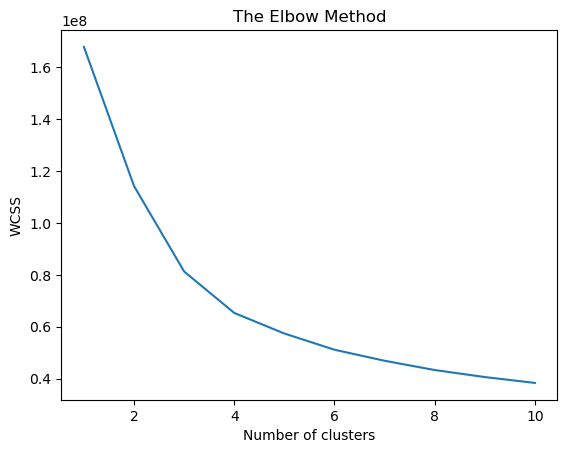

In [679]:
wcss=[]
try:
    for i in range (1,11):
        kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
        kmeans.fit(x_train) # fitting the data to the KMeans Algorithm
        wcss.append(kmeans.inertia_)
    plt.plot(range(1,11),wcss) # creating the graph between WCSS and the number of clusters
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    #plt.show()
    plt.savefig('H:/boiling_liquid_expanding_vapour_explosion/K-Means_Elbow.PNG') # saving the elbow plot locally
    # finding the value of the optimum cluster programmatically
    kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
    print('The optimum number of clusters is: '+str(kn.knee))
    print("kn.knee:",kn.knee)
    number_of_clusters = kn.knee
except Exception as e:
    print('Exception occured in elbow_plot. Exception message:  ' + str(e))
    print('Finding the number of clusters failed.')
    raise Exception()

#### Dividing the data into clusters

In [680]:
import pickle
try:
    kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', random_state=42)
    #self.data = self.data[~self.data.isin([np.nan, np.inf, -np.inf]).any(1)]
    y_kmeans=kmeans.fit_predict(x_train) #  divide data into clusters

    with open("H:/boiling_liquid_expanding_vapour_explosion/KMeans.sav",'wb') as f:
        pickle.dump(kmeans, f)
        
    x_train['Cluster']=y_kmeans  # create a new column in dataset for storing the cluster information
    print('succesfully created '+str(kn.knee))
except Exception as e:
    print('Exception occured in creating clusters. Exception message:  ' + str(e))
    print('Fitting the data to clusters failed.')
    raise Exception()

succesfully created 4


In [681]:
x_train["Cluster"].unique()

array([0, 3, 2, 1])

In [682]:
x_copy = x_train.copy()

In [683]:
#create a new column in the dataset consisting of the corresponding cluster assignments.
x_copy["Labels"] = y_train["Target Pressure (bar)"]

In [684]:
train_final = x_copy.copy() # Copying for not loosing our cluster assignments if any further experiments performed as unexpected

In [685]:
train_final.head()

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position y,Sensor Position z,Obstacle Volume,Tank Volume,Cluster,Labels
0,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,1,37.9,-1,152.0,18,7.90,10.7,85.8,12.96,0,0.199929
1,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,1,37.9,-1,152.0,19,-2.95,-1.9,85.8,12.96,0,0.435681
2,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,1,37.9,-1,152.0,20,-2.95,4.4,85.8,12.96,0,0.264031
3,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,1,37.9,-1,152.0,21,-2.95,10.7,85.8,12.96,0,0.270576
4,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,1,37.9,-1,152.0,22,-2.70,11.0,85.8,12.96,0,0.204675


In [686]:
# getting the unique clusters from our dataset
list_of_clusters=train_final['Cluster'].unique()

In [687]:
list_of_clusters

array([0, 3, 2, 1])

### Looking For Best Model:

In [688]:
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#scalar = StandardScaler()

In [689]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

class Model_Finder:
    """
                This class shall be used to find the model with best accuracy and AUC score.
                Version: 1.0
                Revisions: None

                """

    def __init__(self):
        self.linearReg = LinearRegression()
        self.RandomForestReg = RandomForestRegressor()


    def get_best_params_for_Random_Forest_Regressor(self, train_x, train_y):
        """
                                                Method Name: get_best_params_for_Random_Forest_Regressor
                                                Description: get the parameters for Random_Forest_Regressor Algorithm which give the best accuracy.
                                                             Use Hyper Parameter Tuning.
                                                Output: The model with the best parameters
                                                On Failure: Raise Exception

                                                Version: 1.0
                                                Revisions: None

                                        """
        print('Entered the RandomForestReg method of the Model_Finder class')
        try:
            # initializing with different combination of parameters
            self.param_grid_Random_forest_Tree = {
                                "n_estimators": [10,20,30],
                                "max_features": ["auto", "sqrt", "log2"],
                                "min_samples_split": [2,4,8],
                                "bootstrap": [True, False]
                                                     }

            # Creating an object of the Grid Search class
            self.grid = GridSearchCV(self.RandomForestReg, self.param_grid_Random_forest_Tree, verbose=3, cv=5)
            # finding the best parameters
            self.grid.fit(train_x, train_y)

            # extracting the best parameters
            self.n_estimators = self.grid.best_params_['n_estimators']
            self.max_features = self.grid.best_params_['max_features']
            self.min_samples_split = self.grid.best_params_['min_samples_split']
            self.bootstrap = self.grid.best_params_['bootstrap']

            # creating a new model with the best parameters
            self.decisionTreeReg = RandomForestRegressor(n_estimators=self.n_estimators, max_features=self.max_features,
                                                         min_samples_split=self.min_samples_split, bootstrap=self.bootstrap)
            # training the mew models
            self.decisionTreeReg.fit(train_x, train_y)
            print( 'RandomForestReg best params: ' + str(self.grid.best_params_) + '. Exited the RandomForestReg method of the Model_Finder class')
            return self.decisionTreeReg
        except Exception as e:
            print('Exception occured in RandomForestReg method of the Model_Finder class. Exception message:  ' + str(e))
            print('RandomForestReg Parameter tuning  failed. Exited the knn method of the Model_Finder class')
            raise Exception()

    def get_best_params_for_linearReg(self,train_x,train_y):

        """
                                        Method Name: get_best_params_for_linearReg
                                        Description: get the parameters for LinearReg Algorithm which give the best accuracy.
                                                     Use Hyper Parameter Tuning.
                                        Output: The model with the best parameters
                                        On Failure: Raise Exception

                                        Version: 1.0
                                        Revisions: None

                                """
        print('Entered the get_best_params_for_linearReg method of the Model_Finder class')
        try:
            # initializing with different combination of parameters
            self.param_grid_linearReg = {
                'fit_intercept': [True, False],'copy_X': [True, False]

            }
            # Creating an object of the Grid Search class
            self.grid= GridSearchCV(self.linearReg,self.param_grid_linearReg, verbose=3,cv=5)
            # finding the best parameters
            self.grid.fit(train_x, train_y)

            # extracting the best parameters
            self.fit_intercept = self.grid.best_params_['fit_intercept']
            self.copy_X = self.grid.best_params_['copy_X']

            # creating a new model with the best parameters
            self.linReg = LinearRegression(fit_intercept=self.fit_intercept,copy_X=self.copy_X)
            # training the mew model
            self.linReg.fit(train_x, train_y)
            print('LinearRegression best params: ' + str(self.grid.best_params_) + '. Exited the get_best_params_for_linearReg method of the Model_Finder class')
            return self.linReg
        except Exception as e:
            print('Exception occured in get_best_params_for_linearReg method of the Model_Finder class. Exception message:  ' + str(e))
            print('LinearReg Parameter tuning  failed. Exited the get_best_params_for_linearReg method of the Model_Finder class')
            raise Exception()


    def get_best_model(self,train_x,train_y,test_x,test_y):
        """
                                                Method Name: get_best_model
                                                Description: Find out the Model which has the best AUC score.
                                                Output: The best model name and the model object
                                                On Failure: Raise Exception

                                                Version: 1.0
                                                Revisions: None

                                        """
        print('Entered the get_best_model method of the Model_Finder class')
        # create best model for Linear Regression
        try:

            self.LinearReg= self.get_best_params_for_linearReg(train_x, train_y)
            self.prediction_LinearReg = self.LinearReg.predict(test_x) # Predictions using the LinearReg Model
            self.LinearReg_error = r2_score(test_y,self.prediction_LinearReg)



         # create best model for XGBoost
            self.randomForestReg = self.get_best_params_for_Random_Forest_Regressor(train_x, train_y)
            self.prediction_randomForestReg = self.randomForestReg.predict(test_x)  # Predictions using the randomForestReg Model
            self.prediction_randomForestReg_error = r2_score(test_y,self.prediction_randomForestReg)


            #comparing the two models
            if(self.LinearReg_error <  self.prediction_randomForestReg_error):
                return 'RandomForestRegressor',self.randomForestReg
            else:
                return 'LinearRegression',self.LinearReg

        except Exception as e:
            print('Exception occured in get_best_model method of the Model_Finder class. Exception message:  ' + str(e))
            print('Model Selection Failed. Exited the get_best_model method of the Model_Finder class')
            raise Exception()



In [690]:
r2_list = []

In [691]:
#scalar = StandardScaler()
"""parsing all the clusters and looking for the best ML algorithm to fit on individual cluster"""

for i in list_of_clusters:
    cluster_data=train_final[train_final['Cluster']==i] # filter the data for one cluster

    # Prepare the feature and Label columns
    cluster_features=cluster_data.drop(['Labels','Cluster'],axis=1)
    cluster_label= cluster_data['Labels']

    # splitting the data into training and test set for each cluster one by one
    x_train, x_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=1 / 3, random_state=36)

    # Not scaling them as they are already standardized sklearn.preprocessing.PowerTransformer(standardize=True)
    #x_train_scaled = scalar.fit_transform(x_train)
    #x_test_scaled = scalar.transform(x_test)

    model_finder=Model_Finder() # object initialization

    #getting the best model for each of the clusters
    best_model_name,best_model=model_finder.get_best_model(x_train,y_train,x_test,y_test)
    
    score = r2_score(y_test,best_model.predict(x_test))
    
    r2_list.append(f"Model: {best_model_name}, Score: {score}")
    
    #saving the best model to the directory.
    with open("H:/boiling_liquid_expanding_vapour_explosion/models"+"/"+best_model_name+str(i)+".sav",'wb') as f:
        pickle.dump(best_model,f)

# logging the successful Training
print('Successful End of Training')

Entered the get_best_model method of the Model_Finder class
Entered the get_best_params_for_linearReg method of the Model_Finder class
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...copy_X=True, fit_intercept=True;, score=0.356 total time=   0.0s
[CV 2/5] END ...copy_X=True, fit_intercept=True;, score=0.303 total time=   0.0s
[CV 3/5] END ...copy_X=True, fit_intercept=True;, score=0.314 total time=   0.0s
[CV 4/5] END ...copy_X=True, fit_intercept=True;, score=0.230 total time=   0.0s
[CV 5/5] END ...copy_X=True, fit_intercept=True;, score=0.306 total time=   0.0s
[CV 1/5] END ..copy_X=True, fit_intercept=False;, score=0.355 total time=   0.0s
[CV 2/5] END ..copy_X=True, fit_intercept=False;, score=0.303 total time=   0.0s
[CV 3/5] END ..copy_X=True, fit_intercept=False;, score=0.314 total time=   0.0s
[CV 4/5] END ..copy_X=True, fit_intercept=False;, score=0.230 total time=   0.0s
[CV 5/5] END ..copy_X=True, fit_intercept=False;, score=0.306 total time=   

[CV 5/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.675 total time=   0.1s
[CV 1/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30;, score=0.671 total time=   0.1s
[CV 2/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30;, score=0.763 total time=   0.1s
[CV 3/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30;, score=0.724 total time=   0.1s
[CV 4/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30;, score=0.431 total time=   0.1s
[CV 5/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30;, score=0.695 total time=   0.1s
[CV 1/5] END bootstrap=True, max_features=sqrt, min_samples_split=4, n_estimators=10;, score=0.739 total time=   0.0s
[CV 2/5] END bootstrap=True, max_features=sqrt, min_samples_split=4, n_estimators=10;, score=0.729 total time=   0.0s
[CV 3/5] END bootstrap=True, max_features=sqrt, min_samp

[CV 5/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.577 total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=20;, score=0.671 total time=   0.0s
[CV 2/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=20;, score=0.674 total time=   0.0s
[CV 3/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=20;, score=0.642 total time=   0.0s
[CV 4/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=20;, score=0.358 total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=20;, score=0.575 total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=30;, score=0.674 total time=   0.0s
[CV 2/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=30;, score=0.645 total time=   0.0s
[CV 3/5] END bootstrap=True, max_features=log2, min_samp

[CV 5/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=30;, score=0.811 total time=   0.1s
[CV 1/5] END bootstrap=False, max_features=sqrt, min_samples_split=4, n_estimators=10;, score=0.751 total time=   0.0s
[CV 2/5] END bootstrap=False, max_features=sqrt, min_samples_split=4, n_estimators=10;, score=0.730 total time=   0.0s
[CV 3/5] END bootstrap=False, max_features=sqrt, min_samples_split=4, n_estimators=10;, score=0.735 total time=   0.0s
[CV 4/5] END bootstrap=False, max_features=sqrt, min_samples_split=4, n_estimators=10;, score=0.664 total time=   0.0s
[CV 5/5] END bootstrap=False, max_features=sqrt, min_samples_split=4, n_estimators=10;, score=0.709 total time=   0.0s
[CV 1/5] END bootstrap=False, max_features=sqrt, min_samples_split=4, n_estimators=20;, score=0.689 total time=   0.0s
[CV 2/5] END bootstrap=False, max_features=sqrt, min_samples_split=4, n_estimators=20;, score=0.812 total time=   0.0s
[CV 3/5] END bootstrap=False, max_features=sqrt,

[CV 1/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=30;, score=0.726 total time=   0.0s
[CV 2/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=30;, score=0.732 total time=   0.0s
[CV 3/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=30;, score=0.788 total time=   0.0s
[CV 4/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=30;, score=0.529 total time=   0.0s
[CV 5/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=30;, score=0.629 total time=   0.0s
RandomForestReg best params: {'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 20}. Exited the RandomForestReg method of the Model_Finder class
Entered the get_best_model method of the Model_Finder class
Entered the get_best_params_for_linearReg method of the Model_Finder class
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...copy_X=True, fi

[CV 2/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=10;, score=0.708 total time=   0.0s
[CV 3/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=10;, score=0.828 total time=   0.0s
[CV 4/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=10;, score=0.746 total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=10;, score=0.783 total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.768 total time=   0.2s
[CV 2/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.712 total time=   0.2s
[CV 3/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.775 total time=   0.2s
[CV 4/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.766 total time=   0.2s
[CV 5/5] END bootstrap=True, max_features=sqrt, min_samp

[CV 2/5] END bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=30;, score=0.725 total time=   0.2s
[CV 3/5] END bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=30;, score=0.794 total time=   0.2s
[CV 4/5] END bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=30;, score=0.721 total time=   0.2s
[CV 5/5] END bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=30;, score=0.779 total time=   0.2s
[CV 1/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.748 total time=   0.0s
[CV 2/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.637 total time=   0.0s
[CV 3/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.705 total time=   0.0s
[CV 4/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.629 total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=log2, min_samp

[CV 2/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.805 total time=   0.2s
[CV 3/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.763 total time=   0.2s
[CV 4/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.740 total time=   0.2s
[CV 5/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.828 total time=   0.3s
[CV 1/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=30;, score=0.856 total time=   0.4s
[CV 2/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=30;, score=0.817 total time=   0.4s
[CV 3/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=30;, score=0.826 total time=   0.4s
[CV 4/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=30;, score=0.801 total time=   0.4s
[CV 5/5] END bootstrap=False, max_features=sqrt,

[CV 3/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.757 total time=   0.0s
[CV 4/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.790 total time=   0.0s
[CV 5/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.789 total time=   0.0s
[CV 1/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=20;, score=0.812 total time=   0.1s
[CV 2/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=20;, score=0.714 total time=   0.1s
[CV 3/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=20;, score=0.731 total time=   0.1s
[CV 4/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=20;, score=0.745 total time=   0.1s
[CV 5/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=20;, score=0.784 total time=   0.1s
[CV 1/5] END bootstrap=False, max_features=log2,

[CV 3/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=10;, score=0.727 total time=   0.0s
[CV 4/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=10;, score=-0.209 total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=10;, score=0.396 total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.717 total time=   0.0s
[CV 2/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.505 total time=   0.0s
[CV 3/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.778 total time=   0.0s
[CV 4/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=-0.351 total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.480 total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=sqrt, min_sa

[CV 5/5] END bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=30;, score=0.431 total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.396 total time=   0.0s
[CV 2/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.617 total time=   0.0s
[CV 3/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.539 total time=   0.0s
[CV 4/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.482 total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.420 total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=20;, score=0.588 total time=   0.0s
[CV 2/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=20;, score=0.479 total time=   0.0s
[CV 3/5] END bootstrap=True, max_features=log2, min_samp

[CV 2/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=30;, score=0.710 total time=   0.0s
[CV 3/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=30;, score=0.796 total time=   0.1s
[CV 4/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=30;, score=-0.103 total time=   0.0s
[CV 5/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=30;, score=0.474 total time=   0.0s
[CV 1/5] END bootstrap=False, max_features=sqrt, min_samples_split=4, n_estimators=10;, score=0.569 total time=   0.0s
[CV 2/5] END bootstrap=False, max_features=sqrt, min_samples_split=4, n_estimators=10;, score=0.618 total time=   0.0s
[CV 3/5] END bootstrap=False, max_features=sqrt, min_samples_split=4, n_estimators=10;, score=0.620 total time=   0.0s
[CV 4/5] END bootstrap=False, max_features=sqrt, min_samples_split=4, n_estimators=10;, score=-0.304 total time=   0.0s
[CV 5/5] END bootstrap=False, max_features=sqr

[CV 1/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=30;, score=0.533 total time=   0.0s
[CV 2/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=30;, score=0.585 total time=   0.0s
[CV 3/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=30;, score=0.750 total time=   0.0s
[CV 4/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=30;, score=0.331 total time=   0.0s
[CV 5/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=30;, score=0.395 total time=   0.0s
RandomForestReg best params: {'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 20}. Exited the RandomForestReg method of the Model_Finder class
Entered the get_best_model method of the Model_Finder class
Entered the get_best_params_for_linearReg method of the Model_Finder class
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...copy_X=True, fi

[CV 2/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=10;, score=0.500 total time=   0.1s
[CV 3/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=10;, score=0.684 total time=   0.0s
[CV 4/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=10;, score=0.561 total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=10;, score=0.659 total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.300 total time=   0.1s
[CV 2/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.448 total time=   0.1s
[CV 3/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.760 total time=   0.1s
[CV 4/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.652 total time=   0.1s
[CV 5/5] END bootstrap=True, max_features=sqrt, min_samp

[CV 2/5] END bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=30;, score=0.421 total time=   0.1s
[CV 3/5] END bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=30;, score=0.741 total time=   0.1s
[CV 4/5] END bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=30;, score=0.662 total time=   0.1s
[CV 5/5] END bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=30;, score=0.672 total time=   0.1s
[CV 1/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.261 total time=   0.0s
[CV 2/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.312 total time=   0.0s
[CV 3/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.658 total time=   0.0s
[CV 4/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.606 total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=log2, min_samp

[CV 2/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.522 total time=   0.1s
[CV 3/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.796 total time=   0.1s
[CV 4/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.768 total time=   0.1s
[CV 5/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=20;, score=0.848 total time=   0.1s
[CV 1/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=30;, score=0.158 total time=   0.2s
[CV 2/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=30;, score=0.503 total time=   0.2s
[CV 3/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=30;, score=0.753 total time=   0.2s
[CV 4/5] END bootstrap=False, max_features=sqrt, min_samples_split=2, n_estimators=30;, score=0.771 total time=   0.2s
[CV 5/5] END bootstrap=False, max_features=sqrt,

[CV 4/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.730 total time=   0.0s
[CV 5/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=10;, score=0.686 total time=   0.0s
[CV 1/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=20;, score=0.179 total time=   0.0s
[CV 2/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=20;, score=0.450 total time=   0.0s
[CV 3/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=20;, score=0.751 total time=   0.0s
[CV 4/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=20;, score=0.698 total time=   0.0s
[CV 5/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=20;, score=0.769 total time=   0.0s
[CV 1/5] END bootstrap=False, max_features=log2, min_samples_split=8, n_estimators=30;, score=0.274 total time=   0.1s
[CV 2/5] END bootstrap=False, max_features=log2,

In [692]:
r2_list

['Model: RandomForestRegressor, Score: 0.7765061150702848',
 'Model: RandomForestRegressor, Score: 0.8160162878870754',
 'Model: RandomForestRegressor, Score: 0.6396981250347855',
 'Model: RandomForestRegressor, Score: 0.7811355135094674']

# Pre-Processing Steps For Testing Data

1. Load Testing Data.

2. Create New Columns if required.

3. Removing Uneccesary columns.

4. Look for Non-Numerical features and map them with numerical values.

5. Scale + Normalize Test Data.

In [693]:
test_data = pd.read_csv("H:/boiling_liquid_expanding_vapour_explosion/test(1).csv")

In [694]:
test_data.head()

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z
0,0,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,Superheated,37.9,-1,152.0,1,1,12.05,-5.6,-1.0
1,1,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,Superheated,37.9,-1,152.0,2,1,12.05,-5.6,1.3
2,2,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,Superheated,37.9,-1,152.0,3,1,12.05,-5.6,3.6
3,3,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,Superheated,37.9,-1,152.0,4,1,12.05,0.2,-1.0
4,4,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,Superheated,37.9,-1,152.0,5,1,12.05,0.2,1.3


In [695]:
test_data["Status"] = test_data["Status"].map({'Superheated': 1, 'Subcooled': 2})

In [696]:
test_data["Status"].unique()

array([1, 2], dtype=int64)

In [697]:
test_data['Obstacle Volume'] = test_data['Obstacle Width (m)'] * test_data['Obstacle Height (m)'] * test_data['Obstacle Thickness (m)']
test_data["Tank Volume"] = test_data["Tank Length (m)"] * test_data['Tank Height (m)'] * test_data['Tank Width (m)']

In [698]:
test_data.head()

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Obstacle Volume,Tank Volume
0,0,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,1,37.9,-1,152.0,1,1,12.05,-5.6,-1.0,36.0,52.976
1,1,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,1,37.9,-1,152.0,2,1,12.05,-5.6,1.3,36.0,52.976
2,2,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,1,37.9,-1,152.0,3,1,12.05,-5.6,3.6,36.0,52.976
3,3,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,1,37.9,-1,152.0,4,1,12.05,0.2,-1.0,36.0,52.976
4,4,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,1,37.9,-1,152.0,5,1,12.05,0.2,1.3,36.0,52.976


In [699]:
test_data = test_data.drop(columns=["ID","Sensor Position x","Sensor Position Side"])

In [700]:
test_data.head()

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position y,Sensor Position z,Obstacle Volume,Tank Volume
0,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,1,37.9,-1,152.0,1,-5.6,-1.0,36.0,52.976
1,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,1,37.9,-1,152.0,2,-5.6,1.3,36.0,52.976
2,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,1,37.9,-1,152.0,3,-5.6,3.6,36.0,52.976
3,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,1,37.9,-1,152.0,4,0.2,-1.0,36.0,52.976
4,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,1,37.9,-1,152.0,5,0.2,1.3,36.0,52.976


In [701]:
# Fit and transform the test_data
#from sklearn.preprocessing import PowerTransformer
#pt = PowerTransformer()

#transformed_data = pt.transform(test_data)

# Convert transformed data back to DataFrame
#test_data_transformed = pd.DataFrame(transformed_data, columns=test_data.columns)

In [702]:
#test_data_transformed.head()

In [703]:
#test_data_scaled = scalar.transform(test_data_transformed)

In [704]:
#test_data_scaled = pd.DataFrame(test_data_scaled,columns=test_data_transformed.columns)

In [705]:
#test_data_scaled.head()

## Predicting for Testing Data:

In [706]:
with open("H:/boiling_liquid_expanding_vapour_explosion/KMeans.sav",'rb') as f:
    kmeans = pickle.load(f)

In [707]:
clusters = kmeans.predict(test_data)

In [708]:
test_data["clusters"] = clusters

In [709]:
test_data["clusters"].unique()

array([3, 2, 1, 0])

In [710]:
clusters = test_data["clusters"].unique()

In [711]:
result = []

In [712]:
import os

In [713]:
for i in clusters:
    cluster_data = test_data[test_data["clusters"]==i]
    cluster_data = cluster_data.drop(["clusters"],axis=1)
    
    try:
        cluster_number= i
        folder_name="H:/boiling_liquid_expanding_vapour_explosion/models"
        list_of_model_files = []
        list_of_files = os.listdir(folder_name)
        for file in list_of_files:
            try:
                if (file.index(str(cluster_number))!=-1):
                    model_name=file
            except:
                continue
        model_name=model_name.split('.')[0]
        print(model_name)

    except Exception as e:
        print(f"Exception Occured while finding correct model file: {e}")
        raise Exception()
        
    with open("H:/boiling_liquid_expanding_vapour_explosion/models/" + model_name + ".sav",'rb') as f:
        model = pickle.load(f)
        
    for val in (model.predict(cluster_data.values)):
        result.append(val)

result = pd.DataFrame(result,columns = ["Predictions"])
result.to_csv("H:/boiling_liquid_expanding_vapour_explosion/prediction_output_file/predictions.csv",header=True)

RandomForestRegressor3
RandomForestRegressor2
RandomForestRegressor1
RandomForestRegressor0


In [714]:
ground_truth = pd.read_csv("H:/boiling_liquid_expanding_vapour_explosion/sample_prediction(1).csv")
prediction = pd.read_csv("H:/boiling_liquid_expanding_vapour_explosion/prediction_output_file/predictions.csv")

In [715]:
ground_truth = ground_truth.drop(columns="ID")

In [716]:
ground_truth.head()

,Target Pressure (bar)
0,0.944502
1,0.506173
2,0.306880
3,0.027756
4,0.384144


In [717]:
prediction = prediction.drop(columns="Unnamed: 0")

In [718]:
prediction.head()

,Predictions
0,0.250468
1,0.350441
2,0.284649
3,0.224398
4,0.318601


In [719]:
r2_score(ground_truth,prediction)

-1.4328351295950852